In [554]:
from matplotlib import colors as colors
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 2a) Define a Grid where the cells with obstacles are occupied

In [555]:
n, m = 20,20  # number of rows and columns respectively.

In [556]:
# Create a matrix to represent the cells of the grid
grid = np.zeros((20, 20))

# Define obstacle locations

#Cuboid closest to start
grid[14,15]=grid[14,16]=grid[14,17]=grid[14,18]=grid[14,19]=grid[15,15]=grid[15,16]=grid[15,17]=grid[15,18]=grid[15,19] = 1
#Cylinder closest to start
grid[15,12]=grid[14,11]=grid[14,12]=grid[14,13]=grid[13,12] = 1
#Cylinder up and left from previous cylinder
grid[17,10]=grid[16,9]=grid[16,10] = 1 #=grid[16,11]=grid[15,10]
#Tilted cuboid toward center
grid[11,11]=grid[12,12]=grid[12,11]=grid[8,14]=grid[8,15]=grid[9,15]=grid[9,14]=grid[9,13]=grid[10,14]=grid[10,13]=grid[10,12]=grid[11,12]=grid[11,13]= 1
#Cylinder directly above previous cuboid
grid[12,14]=grid[11,13]=grid[11,14]=grid[11,15]=grid[10,14] = 1
#Cylinder closest to center
grid[13,8]=grid[12,7]=grid[12,8]=grid[12,9]=grid[11,8] = 1
#Cylinder left and up of previous cylinder
grid[15,5]=grid[14,4]=grid[14,5]=grid[14,6]=grid[13,5] = 1
#Top left cuboid
grid[16,6]=grid[16,5]=grid[16,4]=grid[16,3]=grid[16,2]=grid[17,6]=grid[17,5]=grid[17,4]=grid[17,3]=grid[17,2] = 1
#Normal cuboid in center
grid[8,11]=grid[8,10]=grid[8,9]=grid[8,8]=grid[8,7]=grid[9,11]=grid[9,10]=grid[9,9]=grid[9,8]=grid[9,7] = 1
#Cylinder left of previous cuboid
grid[10,4]=grid[9,3]=grid[9,4]=grid[9,5]=grid[8,4] = 1
#Tilted cuboid near goal
grid[2,6]=grid[2,7]=grid[3,7]=grid[3,6]=grid[3,5]=grid[4,6]=grid[4,5]=grid[4,4]=grid[5,5]=grid[5,4]=grid[5,3]=grid[6,3]=grid[6,4] = 1
#Cylinder down and right of center
grid[6,13]=grid[5,12]=grid[5,13]=grid[5,14]=grid[4,13] = 1
#Bottom right cylinder
grid[3,17]=grid[2,16]=grid[2,17]=grid[2,18]=grid[1,17] = 1

#grid

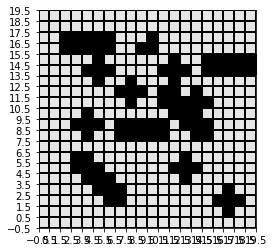

In [557]:
# Plot the grid
def draw_grid():
    fig, ax = plt.subplots()
    cmap = colors.ListedColormap(['0.9', 'black']) # Colors (0.9 is the almost white in gray scale)
    ax.imshow(grid, cmap=cmap, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-0.5, m, 1));
    ax.set_yticks(np.arange(-0.5, n, 1));

draw_grid()

## 2b) Create a graph to represent the grid
Every cell is a node, and adjecent vertices are connected by edges.

In [558]:
import networkx as nx
# This function automatically creates the graph in a grid.
G = nx.grid_2d_graph(n, m) 
print("Number of nodes in a full grid (n*m): ",len(G.nodes()))
# Delete nodes with obstacles
for i in range(n):
    for j in range(m):
        # if the node is an obstacle
        if grid[i][j] == 1:  
            G.remove_node((i,j))

print("Number of nodes after removing obstacles: ",len(G.nodes()))
#print("Nodes:", G.nodes())

Number of nodes in a full grid (n*m):  400
Number of nodes after removing obstacles:  308


## Plot the graph



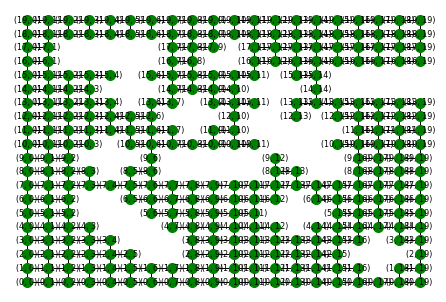

In [559]:
# Position of the nodes
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = (j, i), where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=8, with_labels=True, node_size=100, node_color="g")

### Overlapping the grid and graph

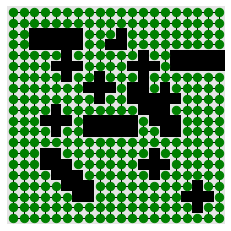

In [560]:
# Plot grid
draw_grid()

# Plot the graph
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = j, -i, where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=5, with_labels=False, node_size=70, node_color="g")


# 2c) Find a path between a pair of nodes

For example: Start at node (3.5) and move to node (3.0). Find a path using the Breadth-First-Search algorithm

In [561]:
start_node =  (19, 18)
end_node = (2,3)

# Run BFS to generate a tree
bfs_tree = nx.bfs_tree(G, source=start_node)

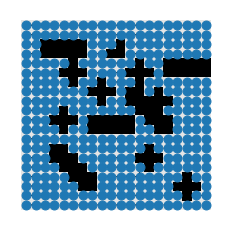

In [562]:
# plot the result of BSF
draw_grid()
nx.draw(bfs_tree, pos = pos, node_size=80)

In [563]:
# Pick the last element and iterate through its predecessors
path_bfs = [end_node]   # A path in a graph is a set of connected nodes
current = end_node

# iterate through its predecessors until finding source node
while current != start_node:
    # Predecesors of the current node        
    for pre in bfs_tree.predecessors(current):
        current = pre
    # add the predecessor to the path
    path_bfs.append(pre)
        
# The current path starts in the goal node and ends at the start node. So we invert it
path_bfs = path_bfs[::-1]

# Correct path
print(path_bfs)

[(19, 18), (18, 18), (17, 18), (16, 18), (16, 17), (16, 16), (16, 15), (16, 14), (16, 13), (16, 12), (16, 11), (15, 11), (15, 10), (14, 10), (13, 10), (12, 10), (11, 10), (10, 10), (10, 9), (10, 8), (10, 7), (10, 6), (9, 6), (8, 6), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 3)]


## Plot the result

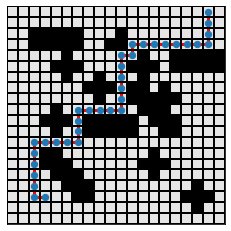

In [564]:
# Edges of the path
E_bfs = [(path_bfs[i], path_bfs[i+1])for i in range(len(path_bfs)-1)]

draw_grid()
nx.draw_networkx_nodes(path_bfs, pos, node_size=40)
nx.draw_networkx_edges(G, nodes=path_bfs, edgelist=E_bfs, pos=pos,edge_color='r', width=3)

# 3a) Implementing A*

In [565]:
# Define heuristic function for A* - takes 2 nodes and returns the Euclidean distance between them.
def distance(node_a, node_b):
    dist = math.sqrt((node_a[0] - node_b[0])**2 + (node_a[1] - node_b[1])**2)
    return dist

In [566]:
# Run A* to generate a path
path_a_star = nx.astar_path(G, source=start_node, target=end_node, heuristic=distance)
print(path_a_star)

[(19, 18), (18, 18), (17, 18), (16, 18), (16, 17), (16, 16), (16, 15), (16, 14), (16, 13), (16, 12), (16, 11), (15, 11), (15, 10), (14, 10), (13, 10), (12, 10), (11, 10), (10, 10), (10, 9), (10, 8), (10, 7), (10, 6), (9, 6), (8, 6), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (2, 3)]


## 3b) Plot the result

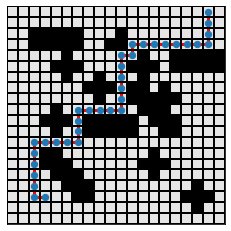

In [567]:
# Edges of the path
E_a_star = [(path_a_star[i], path_a_star[i+1])for i in range(len(path_a_star)-1)]

draw_grid()
nx.draw_networkx_nodes(path_a_star, pos, node_size=40)
nx.draw_networkx_edges(G, nodes=path_a_star, edgelist=E_a_star, pos=pos,edge_color='r', width=3)

# 4c) Comparing BFS and A* with New Starting Position 

# NOTE/WARNING: All communications with the robot for questions 2 and 3 are done further below - important variables get reassigned in this section so run the trajectories before running this code. 

In [551]:
start_node =  (1, 16)
end_node = (2,3)

# Run BFS to generate a tree
bfs_tree = nx.bfs_tree(G, source=start_node)

# Pick the last element and iterate through its predecessors
path_bfs = [end_node]   # A path in a graph is a set of connected nodes
current = end_node

# iterate through its predecessors until finding source node
while current != start_node:
    # Predecesors of the current node        
    for pre in bfs_tree.predecessors(current):
        current = pre
    # add the predecessor to the path
    path_bfs.append(pre)
        
# The current path starts in the goal node and ends at the start node. So we invert it
path_bfs = path_bfs[::-1]

# Correct path
print(path_bfs)

[(1, 16), (1, 15), (1, 14), (1, 13), (1, 12), (1, 11), (1, 10), (1, 9), (1, 8), (1, 7), (1, 6), (1, 5), (2, 5), (2, 4), (2, 3)]


In [552]:
# Run A* to generate a path
path_a_star = nx.astar_path(G, source=start_node, target=end_node, heuristic=distance)
print(path_a_star)

[(1, 16), (1, 15), (1, 14), (1, 13), (1, 12), (1, 11), (1, 10), (1, 9), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (2, 4), (2, 3)]


## Draw graphs

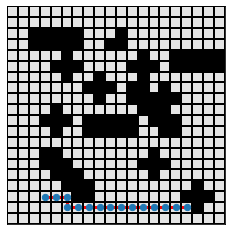

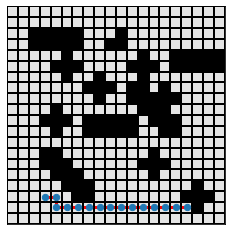

In [553]:
# Redefine grid to avoid weird errors

# Create a matrix to represent the cells of the grid
grid = np.zeros((20, 20))

# Define obstacle locations

#Cuboid closest to start
grid[14,15]=grid[14,16]=grid[14,17]=grid[14,18]=grid[14,19]=grid[15,15]=grid[15,16]=grid[15,17]=grid[15,18]=grid[15,19] = 1
#Cylinder closest to start
grid[15,12]=grid[14,11]=grid[14,12]=grid[14,13]=grid[13,12] = 1
#Cylinder up and left from previous cylinder
grid[17,10]=grid[16,9]=grid[16,10] = 1 #=grid[16,11]=grid[15,10]
#Tilted cuboid toward center
grid[11,11]=grid[12,12]=grid[12,11]=grid[8,14]=grid[8,15]=grid[9,15]=grid[9,14]=grid[9,13]=grid[10,14]=grid[10,13]=grid[10,12]=grid[11,12]=grid[11,13]= 1
#Cylinder directly above previous cuboid
grid[12,14]=grid[11,13]=grid[11,14]=grid[11,15]=grid[10,14] = 1
#Cylinder closest to center
grid[13,8]=grid[12,7]=grid[12,8]=grid[12,9]=grid[11,8] = 1
#Cylinder left and up of previous cylinder
grid[15,5]=grid[14,4]=grid[14,5]=grid[14,6]=grid[13,5] = 1
#Top left cuboid
grid[16,6]=grid[16,5]=grid[16,4]=grid[16,3]=grid[16,2]=grid[17,6]=grid[17,5]=grid[17,4]=grid[17,3]=grid[17,2] = 1
#Normal cuboid in center
grid[8,11]=grid[8,10]=grid[8,9]=grid[8,8]=grid[8,7]=grid[9,11]=grid[9,10]=grid[9,9]=grid[9,8]=grid[9,7] = 1
#Cylinder left of previous cuboid
grid[10,4]=grid[9,3]=grid[9,4]=grid[9,5]=grid[8,4] = 1
#Tilted cuboid near goal
grid[2,6]=grid[2,7]=grid[3,7]=grid[3,6]=grid[3,5]=grid[4,6]=grid[4,5]=grid[4,4]=grid[5,5]=grid[5,4]=grid[5,3]=grid[6,3]=grid[6,4] = 1
#Cylinder down and right of center
grid[6,13]=grid[5,12]=grid[5,13]=grid[5,14]=grid[4,13] = 1
#Bottom right cylinder
grid[3,17]=grid[2,16]=grid[2,17]=grid[2,18]=grid[1,17] = 1


# Edges of the path
E_bfs = [(path_bfs[i], path_bfs[i+1])for i in range(len(path_bfs)-1)]

draw_grid()
nx.draw_networkx_nodes(path_bfs, pos, node_size=40)
nx.draw_networkx_edges(G, nodes=path_bfs, edgelist=E_bfs, pos=pos,edge_color='r', width=3)

# Edges of the path
E_a_star = [(path_a_star[i], path_a_star[i+1])for i in range(len(path_a_star)-1)]

draw_grid()
nx.draw_networkx_nodes(path_a_star, pos, node_size=40)
nx.draw_networkx_edges(G, nodes=path_a_star, edgelist=E_a_star, pos=pos,edge_color='r', width=3)

# Trajectory Functions and Globals

In [568]:
def point_to_point_traj(x1, x2, v1, v2, delta_t, is_x, is_bfs, idx):
    t = np.linspace(0, delta_t, 100)  
    a0 = x1
    a1 = v1
    a2 = (3*x2 - 3*x1 - 2*v1*delta_t - v2 * delta_t) / (delta_t**2)
    a3 = (2*x1 + (v1 + v2) * delta_t  - 2 * x2) / (delta_t**3)

    polynomial = a0 + a1 * t + a2 * t**2 + a3 * t**3
    derivative = a1 + 2*a2 * t + 3 * a3 * t**2
    print('a0: (%.4f) '%(a0))
    print('a1: (%.4f) '%(a1))
    print('a2: (%.4f) '%(a2))
    print('a3: (%.4f) '%(a3))
    if(is_bfs):
        if(is_x):
            a0_pairs_BFS.append([a0,0])
            a1_pairs_BFS.append([a1,0])
            a2_pairs_BFS.append([a2,0])
            a3_pairs_BFS.append([a3,0])
        else:
            a0_pairs_BFS[-1][1] = a0
            a1_pairs_BFS[-1][1] = a1
            a2_pairs_BFS[-1][1] = a2
            a3_pairs_BFS[-1][1] = a3
    else:
        if(is_x):
            a0_pairs_A.append([a0,0])
            a1_pairs_A.append([a1,0])
            a2_pairs_A.append([a2,0])
            a3_pairs_A.append([a3,0])
        else:
            a0_pairs_A[-1][1] = a0
            a1_pairs_A[-1][1] = a1
            a2_pairs_A[-1][1] = a2
            a3_pairs_A[-1][1] = a3
    return polynomial, derivative


def piecewise2D (X,Y, Vx, Vy, T, is_bfs):
    theta_x, theta_y, dx, dy = [], [], [], []
        
    count = 1
    for i in range(len(P)-1):
        print(count)
        print('x')
        theta_xi, dxi = point_to_point_traj(X[i], X[i+1], Vx[i], Vx[i+1], T[i+1] - T[i], True, is_bfs, i)
        print('y')
        theta_yi, dyi = point_to_point_traj(Y[i], Y[i+1], Vy[i], Vy[i+1], T[i+1] - T[i], False, is_bfs, i)
        print('=================')
        
        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi.tolist()
        dy += dyi.tolist()
        count = count+1
        plot(theta_xi, theta_yi)
    return theta_x, theta_y, dx, dy

In [570]:
# Global scope arrays to which we append tuples from trajectory calculations
a0_pairs_BFS = []
a1_pairs_BFS = []
a2_pairs_BFS = []
a3_pairs_BFS = []
a0_pairs_A = []
a1_pairs_A = []
a2_pairs_A = []
a3_pairs_A = []

# 2d) Convert BFS Path to Trajectory

## Deriving Coefficients for Motion Equation for each point along the path

1
x
a0: (8.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
y
a0: (9.0000) 
a1: (0.0000) 
a2: (-0.0300) 
a3: (0.0020) 
2
x
a0: (8.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
y
a0: (8.0000) 
a1: (0.0000) 
a2: (-0.0300) 
a3: (0.0020) 
3
x
a0: (8.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
y
a0: (7.0000) 
a1: (0.0000) 
a2: (-0.0300) 
a3: (0.0020) 
4
x
a0: (8.0000) 
a1: (0.0000) 
a2: (-0.0300) 
a3: (0.0020) 
y
a0: (6.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
5
x
a0: (7.0000) 
a1: (0.0000) 
a2: (-0.0300) 
a3: (0.0020) 
y
a0: (6.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
6
x
a0: (6.0000) 
a1: (0.0000) 
a2: (-0.0300) 
a3: (0.0020) 
y
a0: (6.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
7
x
a0: (5.0000) 
a1: (0.0000) 
a2: (-0.0300) 
a3: (0.0020) 
y
a0: (6.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
8
x
a0: (4.0000) 
a1: (0.0000) 
a2: (-0.0300) 
a3: (0.0020) 
y
a0: (6.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
9
x
a0: (3.0000) 
a1: (0.0000) 
a2: (-0.0300) 
a

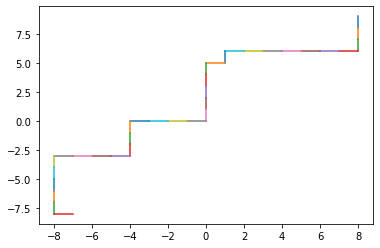

In [571]:
##### Requirements for the trajectory

P_BFS_flipped = np.array(path_bfs)
P_BFS_flipped = np.array([x - 10 for x in P_BFS_flipped])

P_BFS_temp = []
for i in range(len(P_BFS_flipped)):
    P_BFS_temp.append([ P_BFS_flipped[i][1], P_BFS_flipped[i][0] ])
    
P_BFS = np.array(P_BFS_temp)

vel_BFS = []
times_BFS = []
tot = 0
# Time - equal increments
for i in range(len(P_BFS)):
    vel_BFS.append(np.array([0,0]))
    times_BFS.append(tot)
    tot=tot+10

# Grouping for V and T
V_BFS = np.array(vel_BFS)
T_BFS = times_BFS

X_BFS, Y_BFS = P_BFS[:,0], P_BFS[:,1]
Vx_BFS, Vy_BFS = V_BFS[:,0], V_BFS[:,1]

# Piecewise function for spline
theta_x, theta_y, dx, dy = piecewise2D(X_BFS,Y_BFS, Vx_BFS, Vy_BFS, T_BFS, True)

# 3c) Convert A* Path to Trajectory

## Deriving Coefficients for Motion Equation for each point along the path

1
x
a0: (8.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
y
a0: (9.0000) 
a1: (0.0000) 
a2: (-0.7500) 
a3: (0.2500) 
2
x
a0: (8.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
y
a0: (8.0000) 
a1: (0.0000) 
a2: (-0.7500) 
a3: (0.2500) 
3
x
a0: (8.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
y
a0: (7.0000) 
a1: (0.0000) 
a2: (-0.7500) 
a3: (0.2500) 
4
x
a0: (8.0000) 
a1: (0.0000) 
a2: (-0.7500) 
a3: (0.2500) 
y
a0: (6.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
5
x
a0: (7.0000) 
a1: (0.0000) 
a2: (-0.7500) 
a3: (0.2500) 
y
a0: (6.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
6
x
a0: (6.0000) 
a1: (0.0000) 
a2: (-0.7500) 
a3: (0.2500) 
y
a0: (6.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
7
x
a0: (5.0000) 
a1: (0.0000) 
a2: (-0.7500) 
a3: (0.2500) 
y
a0: (6.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
8
x
a0: (4.0000) 
a1: (0.0000) 
a2: (-0.7500) 
a3: (0.2500) 
y
a0: (6.0000) 
a1: (0.0000) 
a2: (0.0000) 
a3: (0.0000) 
9
x
a0: (3.0000) 
a1: (0.0000) 
a2: (-0.7500) 
a

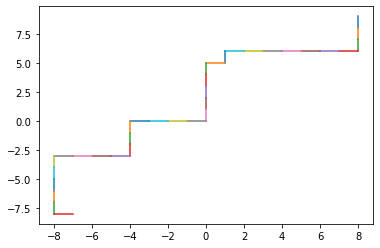

In [572]:
##### Requirements for the trajectory

P_A_flipped = np.array(path_a_star)
P_A_flipped = np.array([x - 10 for x in P_A_flipped])

P_A_temp = []
for i in range(len(P_A_flipped)):
    P_A_temp.append([ P_A_flipped[i][1], P_A_flipped[i][0] ])
    
P_A = np.array(P_A_temp)

vel_A = []
times_A = []
tot = 0
# Time - equal increments
for i in range(len(P_A)):
    vel_A.append(np.array([0,0]))
    times_A.append(tot)
    tot=tot+10

# Grouping for V and T
V_A = np.array(vel_A)
T_A = times
X_A, Y_A = P_A[:,0], P_A[:,1]
Vx_A, Vy_A = V_A[:,0], V_A[:,1]

# Piecewise function for spline
theta_x, theta_y, dx, dy = piecewise2D(X_A,Y_A, Vx_A, Vy_A, T_A, False)

## Connect to CoppeliaSim - Needed for below sections

In [573]:
import sim
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Nick\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Robot Class

In [574]:
class robot():
    
    def __init__(self, frame_name, motor_names=[], client_id=0):  
        # If there is an existing connection
        if client_id:
                self.client_id = client_id
        else:
            self.client_id = self.open_connection()
            
        self.motors = self._get_handlers(motor_names) 
        
        # Robot frame
        self.frame =  self._get_handler(frame_name)
            
        
    def open_connection(self):
        sim.simxFinish(-1)  # just in case, close all opened connections
        self.client_id = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim 
        
        if clientID != -1:
            print('Robot connected')
        else:
            print('Connection failed')
        return clientID
        
    def close_connection(self):    
        sim.simxGetPingTime(self.client_id)  # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive.
        sim.simxFinish(self.client_id)  # Now close the connection to CoppeliaSim:
        print('Connection closed')
    
    def isConnected(self):
        c,result = sim.simxGetPingTime(self.client_id)
        # Return true if the robot is connected
        return result > 0         
        
    def _get_handler(self, name):
        err_code, handler = sim.simxGetObjectHandle(self.client_id, name, sim.simx_opmode_blocking)
        return handler
    
    def _get_handlers(self, names):
        handlers = []
        for name in names:
            handler = self._get_handler(name)
            handlers.append(handler)
        
        return handlers

    def send_motor_velocities(self, vels):
        for motor, vel in zip(self.motors, vels):
            err_code = sim.simxSetJointTargetVelocity(self.client_id, 
                                                      motor, vel, sim.simx_opmode_streaming)      
            
    def set_position(self, position, relative_object=-1):
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)        
        sim.simxSetObjectPosition(clientID, self.frame, relative_object, position, sim.simx_opmode_oneshot)
        
    def simtime(self):
        return sim.simxGetLastCmdTime(self.client_id)
    
    def get_position(self, relative_object=-1):
        # Get position relative to an object, -1 for global frame
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)
        res, position = sim.simxGetObjectPosition(self.client_id, self.frame, relative_object, sim.simx_opmode_blocking)        
        return array(position)
    
    def get_object_position(self, object_name):
        # Get Object position in the world frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, -1, sim.simx_opmode_blocking)
        return array(position)
    
    def get_object_relative_position(self, object_name):        
        # Get Object position in the robot frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, self.frame, sim.simx_opmode_blocking)
        return array(position)

### Check if Python is connecting

In [578]:
sim.simxFinish(-1)  # Close opened connections
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim

if clientID != -1:
    print('Connected')

    # Now try to retrieve data in a blocking fashion (i.e. a service call):
    res, objs = sim.simxGetObjects(clientID, sim.sim_handle_all, sim.simx_opmode_blocking)

    print('Simulation time in milliseconds: ', sim.simxGetLastCmdTime(clientID))
    
    # Get Object position
    name = 'Omnirob'
    err_code, cuboid = sim.simxGetObjectHandle(clientID, name, sim.simx_opmode_blocking)
    res, position = sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)        
    print('Omnirob is at [x,y,z]=', position)
    
    # Now close the connection to CoppeliaSim:
    sim.simxGetPingTime(clientID)
    sim.simxFinish(clientID)
    print('Disconnected')
else:
    print('Failed connecting to remote API server')

Connected
Simulation time in milliseconds:  4050
Omnirob is at [x,y,z]= [7.624996185302734, 8.549596786499023, 0.3544994294643402]
Disconnected


# Sending Commands to Motors Based on Coefficients

In [579]:
# Joint name in coppelia
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)  # Create an instance of our robot

Robot connected


# Running Trajectory Derived from BFS
### Please notice that the code for BFS and A* are slightly redundant to avoid variable name mangling, just in case Python gets confused. I figured a little redundancy is worth it to cover for any misunderstanding I have of Python. 

In [580]:
# Initial locations
robot_position = r.get_position()
print('Robot position: (%.2f, %.2f) '%(robot_position[0], robot_position[1]))

# Virtual disk
disk = robot('Disc', client_id=r.client_id)

# Time duration
tf = 10
# Time interval
time_steps = linspace(0, tf, 100)

count = 0
for wp in range(len(P_BFS) - 1):  
    print("Count: ",count)
    a0 = a0_pairs_BFS[count]
    a1 = a1_pairs_BFS[count]
    a2 = a2_pairs_BFS[count]
    a3 = a3_pairs_BFS[count]
    print('a0: %s'%(a0))
    print('a1: %s'%(a1))
    print('a2: %s'%(a2))
    print('a3: %s'%(a3))

    for t in time_steps:
        # Compute trajectory
        x_point_traj = a0[0] + a1[0]*t + a2[0]*(t**2) + a3[0]*(t**3) #Gamma_x
        x_vel_traj = a1[0] + 2*a2[0]*t + 3*a3[0]*(t**2) #Derivative of Gamma_x
        y_point_traj = a0[1] + a1[1]*t + a2[1]*(t**2) + a3[1]*(t**3) #Gamma_y
        y_vel_traj = a1[1] + 2*a2[1]*t + 3*a3[1]*(t**2) #Derivative of Gamma_y
        print('(%.4f,%.4f)' %(x_point_traj, y_point_traj))
        print('(%.4f,%.4f)' %(x_vel_traj, y_vel_traj))
        print("=============================")

        disk.set_position([x_point_traj, y_point_traj])

        # Sensing
        robot_position = r.get_position()

        # Trajectory tracker
        u = 10 * (np.array([x_point_traj, y_point_traj, 0]) - robot_position) + np.array([x_vel_traj, y_vel_traj, 0])

        vx, vy, vz = u
        r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])

        time.sleep(tf/500)
    
    count+=1

    r.send_motor_velocities([0,0,0,0])
r.close_connection()

Robot position: (7.62, 8.55) 
Robot connected
Count:  0
a0: [8, 9]
a1: [0, 0]
a2: [0.0, -0.03]
a3: [0.0, 0.002]
(8.0000,9.0000)
(0.0000,0.0000)
(8.0000,8.9997)
(0.0000,-0.0060)
(8.0000,8.9988)
(0.0000,-0.0119)
(8.0000,8.9973)
(0.0000,-0.0176)
(8.0000,8.9952)
(0.0000,-0.0233)
(8.0000,8.9926)
(0.0000,-0.0288)
(8.0000,8.9894)
(0.0000,-0.0342)
(8.0000,8.9857)
(0.0000,-0.0394)
(8.0000,8.9815)
(0.0000,-0.0446)
(8.0000,8.9767)
(0.0000,-0.0496)
(8.0000,8.9715)
(0.0000,-0.0545)
(8.0000,8.9657)
(0.0000,-0.0593)
(8.0000,8.9595)
(0.0000,-0.0639)
(8.0000,8.9528)
(0.0000,-0.0684)
(8.0000,8.9457)
(0.0000,-0.0728)
(8.0000,8.9381)
(0.0000,-0.0771)
(8.0000,8.9301)
(0.0000,-0.0813)
(8.0000,8.9217)
(0.0000,-0.0853)
(8.0000,8.9128)
(0.0000,-0.0893)
(8.0000,8.9036)
(0.0000,-0.0931)
(8.0000,8.8941)
(0.0000,-0.0967)
(8.0000,8.8841)
(0.0000,-0.1003)
(8.0000,8.8738)
(0.0000,-0.1037)
(8.0000,8.8632)
(0.0000,-0.1070)
(8.0000,8.8522)
(0.0000,-0.1102)
(8.0000,8.8409)
(0.0000,-0.1133)
(8.0000,8.8293)
(0.0000,-0.1162

(8.0000,7.8053)
(0.0000,-0.1217)
(8.0000,7.7928)
(0.0000,-0.1243)
(8.0000,7.7802)
(0.0000,-0.1267)
(8.0000,7.7673)
(0.0000,-0.1290)
(8.0000,7.7541)
(0.0000,-0.1313)
(8.0000,7.7407)
(0.0000,-0.1333)
(8.0000,7.7272)
(0.0000,-0.1353)
(8.0000,7.7134)
(0.0000,-0.1371)
(8.0000,7.6995)
(0.0000,-0.1388)
(8.0000,7.6854)
(0.0000,-0.1404)
(8.0000,7.6711)
(0.0000,-0.1419)
(8.0000,7.6567)
(0.0000,-0.1433)
(8.0000,7.6422)
(0.0000,-0.1445)
(8.0000,7.6275)
(0.0000,-0.1456)
(8.0000,7.6128)
(0.0000,-0.1466)
(8.0000,7.5979)
(0.0000,-0.1474)
(8.0000,7.5830)
(0.0000,-0.1481)
(8.0000,7.5680)
(0.0000,-0.1488)
(8.0000,7.5529)
(0.0000,-0.1493)
(8.0000,7.5378)
(0.0000,-0.1496)
(8.0000,7.5227)
(0.0000,-0.1499)
(8.0000,7.5076)
(0.0000,-0.1500)
(8.0000,7.4924)
(0.0000,-0.1500)
(8.0000,7.4773)
(0.0000,-0.1499)
(8.0000,7.4622)
(0.0000,-0.1496)
(8.0000,7.4471)
(0.0000,-0.1493)
(8.0000,7.4320)
(0.0000,-0.1488)
(8.0000,7.4170)
(0.0000,-0.1481)
(8.0000,7.4021)
(0.0000,-0.1474)
(8.0000,7.3872)
(0.0000,-0.1466)
(8.0000,7.

(0.0000,-0.1433)
(8.0000,6.3289)
(0.0000,-0.1419)
(8.0000,6.3146)
(0.0000,-0.1404)
(8.0000,6.3005)
(0.0000,-0.1388)
(8.0000,6.2866)
(0.0000,-0.1371)
(8.0000,6.2728)
(0.0000,-0.1353)
(8.0000,6.2593)
(0.0000,-0.1333)
(8.0000,6.2459)
(0.0000,-0.1313)
(8.0000,6.2327)
(0.0000,-0.1290)
(8.0000,6.2198)
(0.0000,-0.1267)
(8.0000,6.2072)
(0.0000,-0.1243)
(8.0000,6.1947)
(0.0000,-0.1217)
(8.0000,6.1826)
(0.0000,-0.1190)
(8.0000,6.1707)
(0.0000,-0.1162)
(8.0000,6.1591)
(0.0000,-0.1133)
(8.0000,6.1478)
(0.0000,-0.1102)
(8.0000,6.1368)
(0.0000,-0.1070)
(8.0000,6.1262)
(0.0000,-0.1037)
(8.0000,6.1159)
(0.0000,-0.1003)
(8.0000,6.1059)
(0.0000,-0.0967)
(8.0000,6.0964)
(0.0000,-0.0931)
(8.0000,6.0872)
(0.0000,-0.0893)
(8.0000,6.0783)
(0.0000,-0.0853)
(8.0000,6.0699)
(0.0000,-0.0813)
(8.0000,6.0619)
(0.0000,-0.0771)
(8.0000,6.0543)
(0.0000,-0.0728)
(8.0000,6.0472)
(0.0000,-0.0684)
(8.0000,6.0405)
(0.0000,-0.0639)
(8.0000,6.0343)
(0.0000,-0.0593)
(8.0000,6.0285)
(0.0000,-0.0545)
(8.0000,6.0233)
(0.0000,-0

(-0.0446,0.0000)
(7.0143,6.0000)
(-0.0394,0.0000)
(7.0106,6.0000)
(-0.0342,0.0000)
(7.0074,6.0000)
(-0.0288,0.0000)
(7.0048,6.0000)
(-0.0233,0.0000)
(7.0027,6.0000)
(-0.0176,0.0000)
(7.0012,6.0000)
(-0.0119,0.0000)
(7.0003,6.0000)
(-0.0060,0.0000)
(7.0000,6.0000)
(0.0000,0.0000)
Count:  4
a0: [7, 6]
a1: [0, 0]
a2: [-0.03, 0.0]
a3: [0.002, 0.0]
(7.0000,6.0000)
(0.0000,0.0000)
(6.9997,6.0000)
(-0.0060,0.0000)
(6.9988,6.0000)
(-0.0119,0.0000)
(6.9973,6.0000)
(-0.0176,0.0000)
(6.9952,6.0000)
(-0.0233,0.0000)
(6.9926,6.0000)
(-0.0288,0.0000)
(6.9894,6.0000)
(-0.0342,0.0000)
(6.9857,6.0000)
(-0.0394,0.0000)
(6.9815,6.0000)
(-0.0446,0.0000)
(6.9767,6.0000)
(-0.0496,0.0000)
(6.9715,6.0000)
(-0.0545,0.0000)
(6.9657,6.0000)
(-0.0593,0.0000)
(6.9595,6.0000)
(-0.0639,0.0000)
(6.9528,6.0000)
(-0.0684,0.0000)
(6.9457,6.0000)
(-0.0728,0.0000)
(6.9381,6.0000)
(-0.0771,0.0000)
(6.9301,6.0000)
(-0.0813,0.0000)
(6.9217,6.0000)
(-0.0853,0.0000)
(6.9128,6.0000)
(-0.0893,0.0000)
(6.9036,6.0000)
(-0.0931,0.0

(5.8632,6.0000)
(-0.1070,0.0000)
(5.8522,6.0000)
(-0.1102,0.0000)
(5.8409,6.0000)
(-0.1133,0.0000)
(5.8293,6.0000)
(-0.1162,0.0000)
(5.8174,6.0000)
(-0.1190,0.0000)
(5.8053,6.0000)
(-0.1217,0.0000)
(5.7928,6.0000)
(-0.1243,0.0000)
(5.7802,6.0000)
(-0.1267,0.0000)
(5.7673,6.0000)
(-0.1290,0.0000)
(5.7541,6.0000)
(-0.1313,0.0000)
(5.7407,6.0000)
(-0.1333,0.0000)
(5.7272,6.0000)
(-0.1353,0.0000)
(5.7134,6.0000)
(-0.1371,0.0000)
(5.6995,6.0000)
(-0.1388,0.0000)
(5.6854,6.0000)
(-0.1404,0.0000)
(5.6711,6.0000)
(-0.1419,0.0000)
(5.6567,6.0000)
(-0.1433,0.0000)
(5.6422,6.0000)
(-0.1445,0.0000)
(5.6275,6.0000)
(-0.1456,0.0000)
(5.6128,6.0000)
(-0.1466,0.0000)
(5.5979,6.0000)
(-0.1474,0.0000)
(5.5830,6.0000)
(-0.1481,0.0000)
(5.5680,6.0000)
(-0.1488,0.0000)
(5.5529,6.0000)
(-0.1493,0.0000)
(5.5378,6.0000)
(-0.1496,0.0000)
(5.5227,6.0000)
(-0.1499,0.0000)
(5.5076,6.0000)
(-0.1500,0.0000)
(5.4924,6.0000)
(-0.1500,0.0000)
(5.4773,6.0000)
(-0.1499,0.0000)
(5.4622,6.0000)
(-0.1496,0.0000)
(5.4471,6.

(4.4170,6.0000)
(-0.1481,0.0000)
(4.4021,6.0000)
(-0.1474,0.0000)
(4.3872,6.0000)
(-0.1466,0.0000)
(4.3725,6.0000)
(-0.1456,0.0000)
(4.3578,6.0000)
(-0.1445,0.0000)
(4.3433,6.0000)
(-0.1433,0.0000)
(4.3289,6.0000)
(-0.1419,0.0000)
(4.3146,6.0000)
(-0.1404,0.0000)
(4.3005,6.0000)
(-0.1388,0.0000)
(4.2866,6.0000)
(-0.1371,0.0000)
(4.2728,6.0000)
(-0.1353,0.0000)
(4.2593,6.0000)
(-0.1333,0.0000)
(4.2459,6.0000)
(-0.1313,0.0000)
(4.2327,6.0000)
(-0.1290,0.0000)
(4.2198,6.0000)
(-0.1267,0.0000)
(4.2072,6.0000)
(-0.1243,0.0000)
(4.1947,6.0000)
(-0.1217,0.0000)
(4.1826,6.0000)
(-0.1190,0.0000)
(4.1707,6.0000)
(-0.1162,0.0000)
(4.1591,6.0000)
(-0.1133,0.0000)
(4.1478,6.0000)
(-0.1102,0.0000)
(4.1368,6.0000)
(-0.1070,0.0000)
(4.1262,6.0000)
(-0.1037,0.0000)
(4.1159,6.0000)
(-0.1003,0.0000)
(4.1059,6.0000)
(-0.0967,0.0000)
(4.0964,6.0000)
(-0.0931,0.0000)
(4.0872,6.0000)
(-0.0893,0.0000)
(4.0783,6.0000)
(-0.0853,0.0000)
(4.0699,6.0000)
(-0.0813,0.0000)
(4.0619,6.0000)
(-0.0771,0.0000)
(4.0543,6.

(3.0285,6.0000)
(-0.0545,0.0000)
(3.0233,6.0000)
(-0.0496,0.0000)
(3.0185,6.0000)
(-0.0446,0.0000)
(3.0143,6.0000)
(-0.0394,0.0000)
(3.0106,6.0000)
(-0.0342,0.0000)
(3.0074,6.0000)
(-0.0288,0.0000)
(3.0048,6.0000)
(-0.0233,0.0000)
(3.0027,6.0000)
(-0.0176,0.0000)
(3.0012,6.0000)
(-0.0119,0.0000)
(3.0003,6.0000)
(-0.0060,0.0000)
(3.0000,6.0000)
(0.0000,0.0000)
Count:  8
a0: [3, 6]
a1: [0, 0]
a2: [-0.03, 0.0]
a3: [0.002, 0.0]
(3.0000,6.0000)
(0.0000,0.0000)
(2.9997,6.0000)
(-0.0060,0.0000)
(2.9988,6.0000)
(-0.0119,0.0000)
(2.9973,6.0000)
(-0.0176,0.0000)
(2.9952,6.0000)
(-0.0233,0.0000)
(2.9926,6.0000)
(-0.0288,0.0000)
(2.9894,6.0000)
(-0.0342,0.0000)
(2.9857,6.0000)
(-0.0394,0.0000)
(2.9815,6.0000)
(-0.0446,0.0000)
(2.9767,6.0000)
(-0.0496,0.0000)
(2.9715,6.0000)
(-0.0545,0.0000)
(2.9657,6.0000)
(-0.0593,0.0000)
(2.9595,6.0000)
(-0.0639,0.0000)
(2.9528,6.0000)
(-0.0684,0.0000)
(2.9457,6.0000)
(-0.0728,0.0000)
(2.9381,6.0000)
(-0.0771,0.0000)
(2.9301,6.0000)
(-0.0813,0.0000)
(2.9217,6.00

(1.9036,6.0000)
(-0.0931,0.0000)
(1.8941,6.0000)
(-0.0967,0.0000)
(1.8841,6.0000)
(-0.1003,0.0000)
(1.8738,6.0000)
(-0.1037,0.0000)
(1.8632,6.0000)
(-0.1070,0.0000)
(1.8522,6.0000)
(-0.1102,0.0000)
(1.8409,6.0000)
(-0.1133,0.0000)
(1.8293,6.0000)
(-0.1162,0.0000)
(1.8174,6.0000)
(-0.1190,0.0000)
(1.8053,6.0000)
(-0.1217,0.0000)
(1.7928,6.0000)
(-0.1243,0.0000)
(1.7802,6.0000)
(-0.1267,0.0000)
(1.7673,6.0000)
(-0.1290,0.0000)
(1.7541,6.0000)
(-0.1313,0.0000)
(1.7407,6.0000)
(-0.1333,0.0000)
(1.7272,6.0000)
(-0.1353,0.0000)
(1.7134,6.0000)
(-0.1371,0.0000)
(1.6995,6.0000)
(-0.1388,0.0000)
(1.6854,6.0000)
(-0.1404,0.0000)
(1.6711,6.0000)
(-0.1419,0.0000)
(1.6567,6.0000)
(-0.1433,0.0000)
(1.6422,6.0000)
(-0.1445,0.0000)
(1.6275,6.0000)
(-0.1456,0.0000)
(1.6128,6.0000)
(-0.1466,0.0000)
(1.5979,6.0000)
(-0.1474,0.0000)
(1.5830,6.0000)
(-0.1481,0.0000)
(1.5680,6.0000)
(-0.1488,0.0000)
(1.5529,6.0000)
(-0.1493,0.0000)
(1.5378,6.0000)
(-0.1496,0.0000)
(1.5227,6.0000)
(-0.1499,0.0000)
(1.5076,6.

(1.0000,5.5076)
(0.0000,-0.1500)
(1.0000,5.4924)
(0.0000,-0.1500)
(1.0000,5.4773)
(0.0000,-0.1499)
(1.0000,5.4622)
(0.0000,-0.1496)
(1.0000,5.4471)
(0.0000,-0.1493)
(1.0000,5.4320)
(0.0000,-0.1488)
(1.0000,5.4170)
(0.0000,-0.1481)
(1.0000,5.4021)
(0.0000,-0.1474)
(1.0000,5.3872)
(0.0000,-0.1466)
(1.0000,5.3725)
(0.0000,-0.1456)
(1.0000,5.3578)
(0.0000,-0.1445)
(1.0000,5.3433)
(0.0000,-0.1433)
(1.0000,5.3289)
(0.0000,-0.1419)
(1.0000,5.3146)
(0.0000,-0.1404)
(1.0000,5.3005)
(0.0000,-0.1388)
(1.0000,5.2866)
(0.0000,-0.1371)
(1.0000,5.2728)
(0.0000,-0.1353)
(1.0000,5.2593)
(0.0000,-0.1333)
(1.0000,5.2459)
(0.0000,-0.1313)
(1.0000,5.2327)
(0.0000,-0.1290)
(1.0000,5.2198)
(0.0000,-0.1267)
(1.0000,5.2072)
(0.0000,-0.1243)
(1.0000,5.1947)
(0.0000,-0.1217)
(1.0000,5.1826)
(0.0000,-0.1190)
(1.0000,5.1707)
(0.0000,-0.1162)
(1.0000,5.1591)
(0.0000,-0.1133)
(1.0000,5.1478)
(0.0000,-0.1102)
(1.0000,5.1368)
(0.0000,-0.1070)
(1.0000,5.1262)
(0.0000,-0.1037)
(1.0000,5.1159)
(0.0000,-0.1003)
(1.0000,5.

(0.0783,5.0000)
(-0.0853,0.0000)
(0.0699,5.0000)
(-0.0813,0.0000)
(0.0619,5.0000)
(-0.0771,0.0000)
(0.0543,5.0000)
(-0.0728,0.0000)
(0.0472,5.0000)
(-0.0684,0.0000)
(0.0405,5.0000)
(-0.0639,0.0000)
(0.0343,5.0000)
(-0.0593,0.0000)
(0.0285,5.0000)
(-0.0545,0.0000)
(0.0233,5.0000)
(-0.0496,0.0000)
(0.0185,5.0000)
(-0.0446,0.0000)
(0.0143,5.0000)
(-0.0394,0.0000)
(0.0106,5.0000)
(-0.0342,0.0000)
(0.0074,5.0000)
(-0.0288,0.0000)
(0.0048,5.0000)
(-0.0233,0.0000)
(0.0027,5.0000)
(-0.0176,0.0000)
(0.0012,5.0000)
(-0.0119,0.0000)
(0.0003,5.0000)
(-0.0060,0.0000)
(0.0000,5.0000)
(0.0000,0.0000)
Count:  12
a0: [0, 5]
a1: [0, 0]
a2: [0.0, -0.03]
a3: [0.0, 0.002]
(0.0000,5.0000)
(0.0000,0.0000)
(0.0000,4.9997)
(0.0000,-0.0060)
(0.0000,4.9988)
(0.0000,-0.0119)
(0.0000,4.9973)
(0.0000,-0.0176)
(0.0000,4.9952)
(0.0000,-0.0233)
(0.0000,4.9926)
(0.0000,-0.0288)
(0.0000,4.9894)
(0.0000,-0.0342)
(0.0000,4.9857)
(0.0000,-0.0394)
(0.0000,4.9815)
(0.0000,-0.0446)
(0.0000,4.9767)
(0.0000,-0.0496)
(0.0000,4.9

(0.0000,3.9595)
(0.0000,-0.0639)
(0.0000,3.9528)
(0.0000,-0.0684)
(0.0000,3.9457)
(0.0000,-0.0728)
(0.0000,3.9381)
(0.0000,-0.0771)
(0.0000,3.9301)
(0.0000,-0.0813)
(0.0000,3.9217)
(0.0000,-0.0853)
(0.0000,3.9128)
(0.0000,-0.0893)
(0.0000,3.9036)
(0.0000,-0.0931)
(0.0000,3.8941)
(0.0000,-0.0967)
(0.0000,3.8841)
(0.0000,-0.1003)
(0.0000,3.8738)
(0.0000,-0.1037)
(0.0000,3.8632)
(0.0000,-0.1070)
(0.0000,3.8522)
(0.0000,-0.1102)
(0.0000,3.8409)
(0.0000,-0.1133)
(0.0000,3.8293)
(0.0000,-0.1162)
(0.0000,3.8174)
(0.0000,-0.1190)
(0.0000,3.8053)
(0.0000,-0.1217)
(0.0000,3.7928)
(0.0000,-0.1243)
(0.0000,3.7802)
(0.0000,-0.1267)
(0.0000,3.7673)
(0.0000,-0.1290)
(0.0000,3.7541)
(0.0000,-0.1313)
(0.0000,3.7407)
(0.0000,-0.1333)
(0.0000,3.7272)
(0.0000,-0.1353)
(0.0000,3.7134)
(0.0000,-0.1371)
(0.0000,3.6995)
(0.0000,-0.1388)
(0.0000,3.6854)
(0.0000,-0.1404)
(0.0000,3.6711)
(0.0000,-0.1419)
(0.0000,3.6567)
(0.0000,-0.1433)
(0.0000,3.6422)
(0.0000,-0.1445)
(0.0000,3.6275)
(0.0000,-0.1456)
(0.0000,3.

(0.0000,2.6128)
(0.0000,-0.1466)
(0.0000,2.5979)
(0.0000,-0.1474)
(0.0000,2.5830)
(0.0000,-0.1481)
(0.0000,2.5680)
(0.0000,-0.1488)
(0.0000,2.5529)
(0.0000,-0.1493)
(0.0000,2.5378)
(0.0000,-0.1496)
(0.0000,2.5227)
(0.0000,-0.1499)
(0.0000,2.5076)
(0.0000,-0.1500)
(0.0000,2.4924)
(0.0000,-0.1500)
(0.0000,2.4773)
(0.0000,-0.1499)
(0.0000,2.4622)
(0.0000,-0.1496)
(0.0000,2.4471)
(0.0000,-0.1493)
(0.0000,2.4320)
(0.0000,-0.1488)
(0.0000,2.4170)
(0.0000,-0.1481)
(0.0000,2.4021)
(0.0000,-0.1474)
(0.0000,2.3872)
(0.0000,-0.1466)
(0.0000,2.3725)
(0.0000,-0.1456)
(0.0000,2.3578)
(0.0000,-0.1445)
(0.0000,2.3433)
(0.0000,-0.1433)
(0.0000,2.3289)
(0.0000,-0.1419)
(0.0000,2.3146)
(0.0000,-0.1404)
(0.0000,2.3005)
(0.0000,-0.1388)
(0.0000,2.2866)
(0.0000,-0.1371)
(0.0000,2.2728)
(0.0000,-0.1353)
(0.0000,2.2593)
(0.0000,-0.1333)
(0.0000,2.2459)
(0.0000,-0.1313)
(0.0000,2.2327)
(0.0000,-0.1290)
(0.0000,2.2198)
(0.0000,-0.1267)
(0.0000,2.2072)
(0.0000,-0.1243)
(0.0000,2.1947)
(0.0000,-0.1217)
(0.0000,2.

(0.0000,-0.1133)
(0.0000,1.1478)
(0.0000,-0.1102)
(0.0000,1.1368)
(0.0000,-0.1070)
(0.0000,1.1262)
(0.0000,-0.1037)
(0.0000,1.1159)
(0.0000,-0.1003)
(0.0000,1.1059)
(0.0000,-0.0967)
(0.0000,1.0964)
(0.0000,-0.0931)
(0.0000,1.0872)
(0.0000,-0.0893)
(0.0000,1.0783)
(0.0000,-0.0853)
(0.0000,1.0699)
(0.0000,-0.0813)
(0.0000,1.0619)
(0.0000,-0.0771)
(0.0000,1.0543)
(0.0000,-0.0728)
(0.0000,1.0472)
(0.0000,-0.0684)
(0.0000,1.0405)
(0.0000,-0.0639)
(0.0000,1.0343)
(0.0000,-0.0593)
(0.0000,1.0285)
(0.0000,-0.0545)
(0.0000,1.0233)
(0.0000,-0.0496)
(0.0000,1.0185)
(0.0000,-0.0446)
(0.0000,1.0143)
(0.0000,-0.0394)
(0.0000,1.0106)
(0.0000,-0.0342)
(0.0000,1.0074)
(0.0000,-0.0288)
(0.0000,1.0048)
(0.0000,-0.0233)
(0.0000,1.0027)
(0.0000,-0.0176)
(0.0000,1.0012)
(0.0000,-0.0119)
(0.0000,1.0003)
(0.0000,-0.0060)
(0.0000,1.0000)
(0.0000,0.0000)
Count:  16
a0: [0, 1]
a1: [0, 0]
a2: [0.0, -0.03]
a3: [0.0, 0.002]
(0.0000,1.0000)
(0.0000,0.0000)
(0.0000,0.9997)
(0.0000,-0.0060)
(0.0000,0.9988)
(0.0000,-0.

(-0.0074,0.0000)
(-0.0288,0.0000)
(-0.0106,0.0000)
(-0.0342,0.0000)
(-0.0143,0.0000)
(-0.0394,0.0000)
(-0.0185,0.0000)
(-0.0446,0.0000)
(-0.0233,0.0000)
(-0.0496,0.0000)
(-0.0285,0.0000)
(-0.0545,0.0000)
(-0.0343,0.0000)
(-0.0593,0.0000)
(-0.0405,0.0000)
(-0.0639,0.0000)
(-0.0472,0.0000)
(-0.0684,0.0000)
(-0.0543,0.0000)
(-0.0728,0.0000)
(-0.0619,0.0000)
(-0.0771,0.0000)
(-0.0699,0.0000)
(-0.0813,0.0000)
(-0.0783,0.0000)
(-0.0853,0.0000)
(-0.0872,0.0000)
(-0.0893,0.0000)
(-0.0964,0.0000)
(-0.0931,0.0000)
(-0.1059,0.0000)
(-0.0967,0.0000)
(-0.1159,0.0000)
(-0.1003,0.0000)
(-0.1262,0.0000)
(-0.1037,0.0000)
(-0.1368,0.0000)
(-0.1070,0.0000)
(-0.1478,0.0000)
(-0.1102,0.0000)
(-0.1591,0.0000)
(-0.1133,0.0000)
(-0.1707,0.0000)
(-0.1162,0.0000)
(-0.1826,0.0000)
(-0.1190,0.0000)
(-0.1947,0.0000)
(-0.1217,0.0000)
(-0.2072,0.0000)
(-0.1243,0.0000)
(-0.2198,0.0000)
(-0.1267,0.0000)
(-0.2327,0.0000)
(-0.1290,0.0000)
(-0.2459,0.0000)
(-0.1313,0.0000)
(-0.2593,0.0000)
(-0.1333,0.0000)
(-0.2728,0.000

(-1.2459,0.0000)
(-0.1313,0.0000)
(-1.2593,0.0000)
(-0.1333,0.0000)
(-1.2728,0.0000)
(-0.1353,0.0000)
(-1.2866,0.0000)
(-0.1371,0.0000)
(-1.3005,0.0000)
(-0.1388,0.0000)
(-1.3146,0.0000)
(-0.1404,0.0000)
(-1.3289,0.0000)
(-0.1419,0.0000)
(-1.3433,0.0000)
(-0.1433,0.0000)
(-1.3578,0.0000)
(-0.1445,0.0000)
(-1.3725,0.0000)
(-0.1456,0.0000)
(-1.3872,0.0000)
(-0.1466,0.0000)
(-1.4021,0.0000)
(-0.1474,0.0000)
(-1.4170,0.0000)
(-0.1481,0.0000)
(-1.4320,0.0000)
(-0.1488,0.0000)
(-1.4471,0.0000)
(-0.1493,0.0000)
(-1.4622,0.0000)
(-0.1496,0.0000)
(-1.4773,0.0000)
(-0.1499,0.0000)
(-1.4924,0.0000)
(-0.1500,0.0000)
(-1.5076,0.0000)
(-0.1500,0.0000)
(-1.5227,0.0000)
(-0.1499,0.0000)
(-1.5378,0.0000)
(-0.1496,0.0000)
(-1.5529,0.0000)
(-0.1493,0.0000)
(-1.5680,0.0000)
(-0.1488,0.0000)
(-1.5830,0.0000)
(-0.1481,0.0000)
(-1.5979,0.0000)
(-0.1474,0.0000)
(-1.6128,0.0000)
(-0.1466,0.0000)
(-1.6275,0.0000)
(-0.1456,0.0000)
(-1.6422,0.0000)
(-0.1445,0.0000)
(-1.6567,0.0000)
(-0.1433,0.0000)
(-1.6711,0.000

(-0.1404,0.0000)
(-2.6995,0.0000)
(-0.1388,0.0000)
(-2.7134,0.0000)
(-0.1371,0.0000)
(-2.7272,0.0000)
(-0.1353,0.0000)
(-2.7407,0.0000)
(-0.1333,0.0000)
(-2.7541,0.0000)
(-0.1313,0.0000)
(-2.7673,0.0000)
(-0.1290,0.0000)
(-2.7802,0.0000)
(-0.1267,0.0000)
(-2.7928,0.0000)
(-0.1243,0.0000)
(-2.8053,0.0000)
(-0.1217,0.0000)
(-2.8174,0.0000)
(-0.1190,0.0000)
(-2.8293,0.0000)
(-0.1162,0.0000)
(-2.8409,0.0000)
(-0.1133,0.0000)
(-2.8522,0.0000)
(-0.1102,0.0000)
(-2.8632,0.0000)
(-0.1070,0.0000)
(-2.8738,0.0000)
(-0.1037,0.0000)
(-2.8841,0.0000)
(-0.1003,0.0000)
(-2.8941,0.0000)
(-0.0967,0.0000)
(-2.9036,0.0000)
(-0.0931,0.0000)
(-2.9128,0.0000)
(-0.0893,0.0000)
(-2.9217,0.0000)
(-0.0853,0.0000)
(-2.9301,0.0000)
(-0.0813,0.0000)
(-2.9381,0.0000)
(-0.0771,0.0000)
(-2.9457,0.0000)
(-0.0728,0.0000)
(-2.9528,0.0000)
(-0.0684,0.0000)
(-2.9595,0.0000)
(-0.0639,0.0000)
(-2.9657,0.0000)
(-0.0593,0.0000)
(-2.9715,0.0000)
(-0.0545,0.0000)
(-2.9767,0.0000)
(-0.0496,0.0000)
(-2.9815,0.0000)
(-0.0446,0.000

(-3.9857,0.0000)
(-0.0394,0.0000)
(-3.9894,0.0000)
(-0.0342,0.0000)
(-3.9926,0.0000)
(-0.0288,0.0000)
(-3.9952,0.0000)
(-0.0233,0.0000)
(-3.9973,0.0000)
(-0.0176,0.0000)
(-3.9988,0.0000)
(-0.0119,0.0000)
(-3.9997,0.0000)
(-0.0060,0.0000)
(-4.0000,0.0000)
(0.0000,0.0000)
Count:  21
a0: [-4, 0]
a1: [0, 0]
a2: [0.0, -0.03]
a3: [0.0, 0.002]
(-4.0000,0.0000)
(0.0000,0.0000)
(-4.0000,-0.0003)
(0.0000,-0.0060)
(-4.0000,-0.0012)
(0.0000,-0.0119)
(-4.0000,-0.0027)
(0.0000,-0.0176)
(-4.0000,-0.0048)
(0.0000,-0.0233)
(-4.0000,-0.0074)
(0.0000,-0.0288)
(-4.0000,-0.0106)
(0.0000,-0.0342)
(-4.0000,-0.0143)
(0.0000,-0.0394)
(-4.0000,-0.0185)
(0.0000,-0.0446)
(-4.0000,-0.0233)
(0.0000,-0.0496)
(-4.0000,-0.0285)
(0.0000,-0.0545)
(-4.0000,-0.0343)
(0.0000,-0.0593)
(-4.0000,-0.0405)
(0.0000,-0.0639)
(-4.0000,-0.0472)
(0.0000,-0.0684)
(-4.0000,-0.0543)
(0.0000,-0.0728)
(-4.0000,-0.0619)
(0.0000,-0.0771)
(-4.0000,-0.0699)
(0.0000,-0.0813)
(-4.0000,-0.0783)
(0.0000,-0.0853)
(-4.0000,-0.0872)
(0.0000,-0.0893

(-4.0000,-1.0964)
(0.0000,-0.0931)
(-4.0000,-1.1059)
(0.0000,-0.0967)
(-4.0000,-1.1159)
(0.0000,-0.1003)
(-4.0000,-1.1262)
(0.0000,-0.1037)
(-4.0000,-1.1368)
(0.0000,-0.1070)
(-4.0000,-1.1478)
(0.0000,-0.1102)
(-4.0000,-1.1591)
(0.0000,-0.1133)
(-4.0000,-1.1707)
(0.0000,-0.1162)
(-4.0000,-1.1826)
(0.0000,-0.1190)
(-4.0000,-1.1947)
(0.0000,-0.1217)
(-4.0000,-1.2072)
(0.0000,-0.1243)
(-4.0000,-1.2198)
(0.0000,-0.1267)
(-4.0000,-1.2327)
(0.0000,-0.1290)
(-4.0000,-1.2459)
(0.0000,-0.1313)
(-4.0000,-1.2593)
(0.0000,-0.1333)
(-4.0000,-1.2728)
(0.0000,-0.1353)
(-4.0000,-1.2866)
(0.0000,-0.1371)
(-4.0000,-1.3005)
(0.0000,-0.1388)
(-4.0000,-1.3146)
(0.0000,-0.1404)
(-4.0000,-1.3289)
(0.0000,-0.1419)
(-4.0000,-1.3433)
(0.0000,-0.1433)
(-4.0000,-1.3578)
(0.0000,-0.1445)
(-4.0000,-1.3725)
(0.0000,-0.1456)
(-4.0000,-1.3872)
(0.0000,-0.1466)
(-4.0000,-1.4021)
(0.0000,-0.1474)
(-4.0000,-1.4170)
(0.0000,-0.1481)
(-4.0000,-1.4320)
(0.0000,-0.1488)
(-4.0000,-1.4471)
(0.0000,-0.1493)
(-4.0000,-1.4622)
(0

(0.0000,-0.1496)
(-4.0000,-2.4773)
(0.0000,-0.1499)
(-4.0000,-2.4924)
(0.0000,-0.1500)
(-4.0000,-2.5076)
(0.0000,-0.1500)
(-4.0000,-2.5227)
(0.0000,-0.1499)
(-4.0000,-2.5378)
(0.0000,-0.1496)
(-4.0000,-2.5529)
(0.0000,-0.1493)
(-4.0000,-2.5680)
(0.0000,-0.1488)
(-4.0000,-2.5830)
(0.0000,-0.1481)
(-4.0000,-2.5979)
(0.0000,-0.1474)
(-4.0000,-2.6128)
(0.0000,-0.1466)
(-4.0000,-2.6275)
(0.0000,-0.1456)
(-4.0000,-2.6422)
(0.0000,-0.1445)
(-4.0000,-2.6567)
(0.0000,-0.1433)
(-4.0000,-2.6711)
(0.0000,-0.1419)
(-4.0000,-2.6854)
(0.0000,-0.1404)
(-4.0000,-2.6995)
(0.0000,-0.1388)
(-4.0000,-2.7134)
(0.0000,-0.1371)
(-4.0000,-2.7272)
(0.0000,-0.1353)
(-4.0000,-2.7407)
(0.0000,-0.1333)
(-4.0000,-2.7541)
(0.0000,-0.1313)
(-4.0000,-2.7673)
(0.0000,-0.1290)
(-4.0000,-2.7802)
(0.0000,-0.1267)
(-4.0000,-2.7928)
(0.0000,-0.1243)
(-4.0000,-2.8053)
(0.0000,-0.1217)
(-4.0000,-2.8174)
(0.0000,-0.1190)
(-4.0000,-2.8293)
(0.0000,-0.1162)
(-4.0000,-2.8409)
(0.0000,-0.1133)
(-4.0000,-2.8522)
(0.0000,-0.1102)
(-4

(-4.8738,-3.0000)
(-0.1037,0.0000)
(-4.8841,-3.0000)
(-0.1003,0.0000)
(-4.8941,-3.0000)
(-0.0967,0.0000)
(-4.9036,-3.0000)
(-0.0931,0.0000)
(-4.9128,-3.0000)
(-0.0893,0.0000)
(-4.9217,-3.0000)
(-0.0853,0.0000)
(-4.9301,-3.0000)
(-0.0813,0.0000)
(-4.9381,-3.0000)
(-0.0771,0.0000)
(-4.9457,-3.0000)
(-0.0728,0.0000)
(-4.9528,-3.0000)
(-0.0684,0.0000)
(-4.9595,-3.0000)
(-0.0639,0.0000)
(-4.9657,-3.0000)
(-0.0593,0.0000)
(-4.9715,-3.0000)
(-0.0545,0.0000)
(-4.9767,-3.0000)
(-0.0496,0.0000)
(-4.9815,-3.0000)
(-0.0446,0.0000)
(-4.9857,-3.0000)
(-0.0394,0.0000)
(-4.9894,-3.0000)
(-0.0342,0.0000)
(-4.9926,-3.0000)
(-0.0288,0.0000)
(-4.9952,-3.0000)
(-0.0233,0.0000)
(-4.9973,-3.0000)
(-0.0176,0.0000)
(-4.9988,-3.0000)
(-0.0119,0.0000)
(-4.9997,-3.0000)
(-0.0060,0.0000)
(-5.0000,-3.0000)
(0.0000,0.0000)
Count:  25
a0: [-5, -3]
a1: [0, 0]
a2: [-0.03, 0.0]
a3: [0.002, 0.0]
(-5.0000,-3.0000)
(0.0000,0.0000)
(-5.0003,-3.0000)
(-0.0060,0.0000)
(-5.0012,-3.0000)
(-0.0119,0.0000)
(-5.0027,-3.0000)
(-0.0

(-6.0012,-3.0000)
(-0.0119,0.0000)
(-6.0027,-3.0000)
(-0.0176,0.0000)
(-6.0048,-3.0000)
(-0.0233,0.0000)
(-6.0074,-3.0000)
(-0.0288,0.0000)
(-6.0106,-3.0000)
(-0.0342,0.0000)
(-6.0143,-3.0000)
(-0.0394,0.0000)
(-6.0185,-3.0000)
(-0.0446,0.0000)
(-6.0233,-3.0000)
(-0.0496,0.0000)
(-6.0285,-3.0000)
(-0.0545,0.0000)
(-6.0343,-3.0000)
(-0.0593,0.0000)
(-6.0405,-3.0000)
(-0.0639,0.0000)
(-6.0472,-3.0000)
(-0.0684,0.0000)
(-6.0543,-3.0000)
(-0.0728,0.0000)
(-6.0619,-3.0000)
(-0.0771,0.0000)
(-6.0699,-3.0000)
(-0.0813,0.0000)
(-6.0783,-3.0000)
(-0.0853,0.0000)
(-6.0872,-3.0000)
(-0.0893,0.0000)
(-6.0964,-3.0000)
(-0.0931,0.0000)
(-6.1059,-3.0000)
(-0.0967,0.0000)
(-6.1159,-3.0000)
(-0.1003,0.0000)
(-6.1262,-3.0000)
(-0.1037,0.0000)
(-6.1368,-3.0000)
(-0.1070,0.0000)
(-6.1478,-3.0000)
(-0.1102,0.0000)
(-6.1591,-3.0000)
(-0.1133,0.0000)
(-6.1707,-3.0000)
(-0.1162,0.0000)
(-6.1826,-3.0000)
(-0.1190,0.0000)
(-6.1947,-3.0000)
(-0.1217,0.0000)
(-6.2072,-3.0000)
(-0.1243,0.0000)
(-6.2198,-3.0000)
(-

(-7.2198,-3.0000)
(-0.1267,0.0000)
(-7.2327,-3.0000)
(-0.1290,0.0000)
(-7.2459,-3.0000)
(-0.1313,0.0000)
(-7.2593,-3.0000)
(-0.1333,0.0000)
(-7.2728,-3.0000)
(-0.1353,0.0000)
(-7.2866,-3.0000)
(-0.1371,0.0000)
(-7.3005,-3.0000)
(-0.1388,0.0000)
(-7.3146,-3.0000)
(-0.1404,0.0000)
(-7.3289,-3.0000)
(-0.1419,0.0000)
(-7.3433,-3.0000)
(-0.1433,0.0000)
(-7.3578,-3.0000)
(-0.1445,0.0000)
(-7.3725,-3.0000)
(-0.1456,0.0000)
(-7.3872,-3.0000)
(-0.1466,0.0000)
(-7.4021,-3.0000)
(-0.1474,0.0000)
(-7.4170,-3.0000)
(-0.1481,0.0000)
(-7.4320,-3.0000)
(-0.1488,0.0000)
(-7.4471,-3.0000)
(-0.1493,0.0000)
(-7.4622,-3.0000)
(-0.1496,0.0000)
(-7.4773,-3.0000)
(-0.1499,0.0000)
(-7.4924,-3.0000)
(-0.1500,0.0000)
(-7.5076,-3.0000)
(-0.1500,0.0000)
(-7.5227,-3.0000)
(-0.1499,0.0000)
(-7.5378,-3.0000)
(-0.1496,0.0000)
(-7.5529,-3.0000)
(-0.1493,0.0000)
(-7.5680,-3.0000)
(-0.1488,0.0000)
(-7.5830,-3.0000)
(-0.1481,0.0000)
(-7.5979,-3.0000)
(-0.1474,0.0000)
(-7.6128,-3.0000)
(-0.1466,0.0000)
(-7.6275,-3.0000)
(-

(0.0000,-0.1466)
(-8.0000,-3.6275)
(0.0000,-0.1456)
(-8.0000,-3.6422)
(0.0000,-0.1445)
(-8.0000,-3.6567)
(0.0000,-0.1433)
(-8.0000,-3.6711)
(0.0000,-0.1419)
(-8.0000,-3.6854)
(0.0000,-0.1404)
(-8.0000,-3.6995)
(0.0000,-0.1388)
(-8.0000,-3.7134)
(0.0000,-0.1371)
(-8.0000,-3.7272)
(0.0000,-0.1353)
(-8.0000,-3.7407)
(0.0000,-0.1333)
(-8.0000,-3.7541)
(0.0000,-0.1313)
(-8.0000,-3.7673)
(0.0000,-0.1290)
(-8.0000,-3.7802)
(0.0000,-0.1267)
(-8.0000,-3.7928)
(0.0000,-0.1243)
(-8.0000,-3.8053)
(0.0000,-0.1217)
(-8.0000,-3.8174)
(0.0000,-0.1190)
(-8.0000,-3.8293)
(0.0000,-0.1162)
(-8.0000,-3.8409)
(0.0000,-0.1133)
(-8.0000,-3.8522)
(0.0000,-0.1102)
(-8.0000,-3.8632)
(0.0000,-0.1070)
(-8.0000,-3.8738)
(0.0000,-0.1037)
(-8.0000,-3.8841)
(0.0000,-0.1003)
(-8.0000,-3.8941)
(0.0000,-0.0967)
(-8.0000,-3.9036)
(0.0000,-0.0931)
(-8.0000,-3.9128)
(0.0000,-0.0893)
(-8.0000,-3.9217)
(0.0000,-0.0853)
(-8.0000,-3.9301)
(0.0000,-0.0813)
(-8.0000,-3.9381)
(0.0000,-0.0771)
(-8.0000,-3.9457)
(0.0000,-0.0728)
(-8

(-8.0000,-4.9381)
(0.0000,-0.0771)
(-8.0000,-4.9457)
(0.0000,-0.0728)
(-8.0000,-4.9528)
(0.0000,-0.0684)
(-8.0000,-4.9595)
(0.0000,-0.0639)
(-8.0000,-4.9657)
(0.0000,-0.0593)
(-8.0000,-4.9715)
(0.0000,-0.0545)
(-8.0000,-4.9767)
(0.0000,-0.0496)
(-8.0000,-4.9815)
(0.0000,-0.0446)
(-8.0000,-4.9857)
(0.0000,-0.0394)
(-8.0000,-4.9894)
(0.0000,-0.0342)
(-8.0000,-4.9926)
(0.0000,-0.0288)
(-8.0000,-4.9952)
(0.0000,-0.0233)
(-8.0000,-4.9973)
(0.0000,-0.0176)
(-8.0000,-4.9988)
(0.0000,-0.0119)
(-8.0000,-4.9997)
(0.0000,-0.0060)
(-8.0000,-5.0000)
(0.0000,0.0000)
Count:  30
a0: [-8, -5]
a1: [0, 0]
a2: [0.0, -0.03]
a3: [0.0, 0.002]
(-8.0000,-5.0000)
(0.0000,0.0000)
(-8.0000,-5.0003)
(0.0000,-0.0060)
(-8.0000,-5.0012)
(0.0000,-0.0119)
(-8.0000,-5.0027)
(0.0000,-0.0176)
(-8.0000,-5.0048)
(0.0000,-0.0233)
(-8.0000,-5.0074)
(0.0000,-0.0288)
(-8.0000,-5.0106)
(0.0000,-0.0342)
(-8.0000,-5.0143)
(0.0000,-0.0394)
(-8.0000,-5.0185)
(0.0000,-0.0446)
(-8.0000,-5.0233)
(0.0000,-0.0496)
(-8.0000,-5.0285)
(0.00

(-8.0000,-6.0285)
(0.0000,-0.0545)
(-8.0000,-6.0343)
(0.0000,-0.0593)
(-8.0000,-6.0405)
(0.0000,-0.0639)
(-8.0000,-6.0472)
(0.0000,-0.0684)
(-8.0000,-6.0543)
(0.0000,-0.0728)
(-8.0000,-6.0619)
(0.0000,-0.0771)
(-8.0000,-6.0699)
(0.0000,-0.0813)
(-8.0000,-6.0783)
(0.0000,-0.0853)
(-8.0000,-6.0872)
(0.0000,-0.0893)
(-8.0000,-6.0964)
(0.0000,-0.0931)
(-8.0000,-6.1059)
(0.0000,-0.0967)
(-8.0000,-6.1159)
(0.0000,-0.1003)
(-8.0000,-6.1262)
(0.0000,-0.1037)
(-8.0000,-6.1368)
(0.0000,-0.1070)
(-8.0000,-6.1478)
(0.0000,-0.1102)
(-8.0000,-6.1591)
(0.0000,-0.1133)
(-8.0000,-6.1707)
(0.0000,-0.1162)
(-8.0000,-6.1826)
(0.0000,-0.1190)
(-8.0000,-6.1947)
(0.0000,-0.1217)
(-8.0000,-6.2072)
(0.0000,-0.1243)
(-8.0000,-6.2198)
(0.0000,-0.1267)
(-8.0000,-6.2327)
(0.0000,-0.1290)
(-8.0000,-6.2459)
(0.0000,-0.1313)
(-8.0000,-6.2593)
(0.0000,-0.1333)
(-8.0000,-6.2728)
(0.0000,-0.1353)
(-8.0000,-6.2866)
(0.0000,-0.1371)
(-8.0000,-6.3005)
(0.0000,-0.1388)
(-8.0000,-6.3146)
(0.0000,-0.1404)
(-8.0000,-6.3289)
(0

(-8.0000,-7.3433)
(0.0000,-0.1433)
(-8.0000,-7.3578)
(0.0000,-0.1445)
(-8.0000,-7.3725)
(0.0000,-0.1456)
(-8.0000,-7.3872)
(0.0000,-0.1466)
(-8.0000,-7.4021)
(0.0000,-0.1474)
(-8.0000,-7.4170)
(0.0000,-0.1481)
(-8.0000,-7.4320)
(0.0000,-0.1488)
(-8.0000,-7.4471)
(0.0000,-0.1493)
(-8.0000,-7.4622)
(0.0000,-0.1496)
(-8.0000,-7.4773)
(0.0000,-0.1499)
(-8.0000,-7.4924)
(0.0000,-0.1500)
(-8.0000,-7.5076)
(0.0000,-0.1500)
(-8.0000,-7.5227)
(0.0000,-0.1499)
(-8.0000,-7.5378)
(0.0000,-0.1496)
(-8.0000,-7.5529)
(0.0000,-0.1493)
(-8.0000,-7.5680)
(0.0000,-0.1488)
(-8.0000,-7.5830)
(0.0000,-0.1481)
(-8.0000,-7.5979)
(0.0000,-0.1474)
(-8.0000,-7.6128)
(0.0000,-0.1466)
(-8.0000,-7.6275)
(0.0000,-0.1456)
(-8.0000,-7.6422)
(0.0000,-0.1445)
(-8.0000,-7.6567)
(0.0000,-0.1433)
(-8.0000,-7.6711)
(0.0000,-0.1419)
(-8.0000,-7.6854)
(0.0000,-0.1404)
(-8.0000,-7.6995)
(0.0000,-0.1388)
(-8.0000,-7.7134)
(0.0000,-0.1371)
(-8.0000,-7.7272)
(0.0000,-0.1353)
(-8.0000,-7.7407)
(0.0000,-0.1333)
(-8.0000,-7.7541)
(0

(-7.2327,-8.0000)
(0.1290,0.0000)
(-7.2198,-8.0000)
(0.1267,0.0000)
(-7.2072,-8.0000)
(0.1243,0.0000)
(-7.1947,-8.0000)
(0.1217,0.0000)
(-7.1826,-8.0000)
(0.1190,0.0000)
(-7.1707,-8.0000)
(0.1162,0.0000)
(-7.1591,-8.0000)
(0.1133,0.0000)
(-7.1478,-8.0000)
(0.1102,0.0000)
(-7.1368,-8.0000)
(0.1070,0.0000)
(-7.1262,-8.0000)
(0.1037,0.0000)
(-7.1159,-8.0000)
(0.1003,0.0000)
(-7.1059,-8.0000)
(0.0967,0.0000)
(-7.0964,-8.0000)
(0.0931,0.0000)
(-7.0872,-8.0000)
(0.0893,0.0000)
(-7.0783,-8.0000)
(0.0853,0.0000)
(-7.0699,-8.0000)
(0.0813,0.0000)
(-7.0619,-8.0000)
(0.0771,0.0000)
(-7.0543,-8.0000)
(0.0728,0.0000)
(-7.0472,-8.0000)
(0.0684,0.0000)
(-7.0405,-8.0000)
(0.0639,0.0000)
(-7.0343,-8.0000)
(0.0593,0.0000)
(-7.0285,-8.0000)
(0.0545,0.0000)
(-7.0233,-8.0000)
(0.0496,0.0000)
(-7.0185,-8.0000)
(0.0446,0.0000)
(-7.0143,-8.0000)
(0.0394,0.0000)
(-7.0106,-8.0000)
(0.0342,0.0000)
(-7.0074,-8.0000)
(0.0288,0.0000)
(-7.0048,-8.0000)
(0.0233,0.0000)
(-7.0027,-8.0000)
(0.0176,0.0000)
(-7.0012,-8.00

# Running Trajectory Derived from A*

In [ ]:
# Initial locations
robot_position = r.get_position()
print('Robot position: (%.2f, %.2f) '%(robot_position[0], robot_position[1]))

# Virtual disk
disk = robot('Disc', client_id=r.client_id)

# Time duration
tf = 10
# Time interval
time_steps = linspace(0, tf, 500)

count = 0
for wp in range(len(P_A) - 1):  
    print("Count: ", count)
    a0 = a0_pairs[count]
    a1 = a1_pairs[count]
    a2 = a2_pairs[count]
    a3 = a3_pairs[count]
    print('a0: %s'%(a0))
    print('a1: %s'%(a1))
    print('a2: %s'%(a2))
    print('a3: %s'%(a3))

    for t in time_steps:
        # Compute trajectory
        x_point_traj = a0[0] + a1[0]*t + a2[0]*(t**2) + a3[0]*(t**3) #Gamma_x
        x_vel_traj = a1[0] + 2*a2[0]*t + 3*a3[0]*(t**2) #Derivative of Gamma_x
        y_point_traj = a0[1] + a1[1]*t + a2[1]*(t**2) + a3[1]*(t**3) #Gamma_y
        y_vel_traj = a1[1] + 2*a2[1]*t + 3*a3[1]*(t**2) #Derivative of Gamma_y
        print('(%.4f,%.4f)' %(x_point_traj, y_point_traj))

        disk.set_position([x_point_traj, y_point_traj])

        # Sensing
        robot_position = r.get_position()

        # Trajectory tracker
        u = 10 * (np.array([x_point_traj, y_point_traj, 0]) - robot_position) + np.array([x_vel_traj, y_vel_traj, 0])

        vx, vy, vz = u
        r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])

        time.sleep(tf/500)
    
    count+=1

    r.send_motor_velocities([0,0,0,0])
r.close_connection()